### importing the liabraris

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Observation: we can see some anonymous columns in the dataset which specify hidden information about the credit card customers like transaction id which are scaled to hide the actual data to protect the privacy of the customer.

In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### the dependent column have binary classification values. but the values are in imbalanced so we need to apply imbalance techniques

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### value_count()

In [9]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Time: [0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
V1: [-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
V2: [-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
V3: [ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
V4: [ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
V5: [-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
V6: [ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
V7: [ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
V8: [ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
V9: [ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
V10: [ 0.09079417 -0.16697441  0.20764287 ... -0.48478176 -0.39912565
 -0.91542665]
V11: [-0.55159953  1.61272666  0.62450146 ...  0.41161374 -1.93384882
 -1.04045834]


In [10]:
for col in list(df):
    print(col, df[col].nunique())

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


In [11]:
df.Class.value_counts()

# 0 is good customers
# 1 is fraud customers

0    284315
1       492
Name: Class, dtype: int64

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

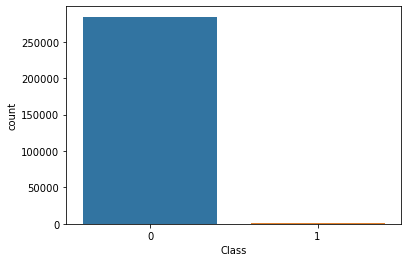

In [12]:
sns.countplot(df['Class'])

### missing values

<AxesSubplot:>

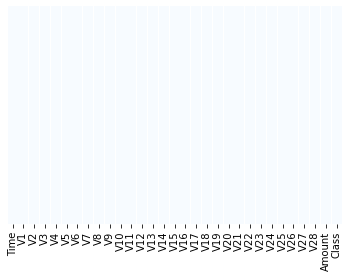

In [13]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Duplicate values

In [16]:
df.duplicated().sum()

1081

### Dividing the dataset into indepedent and dependent variales

In [80]:
# Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

### splitting the datset into train and test

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

### Logistic Classification

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Confusion Matrix and Classification Report

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_log=log.predict(X_test)
print(confusion_matrix(y_test,y_pred_log))
print(accuracy_score(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

[[85237    31]
 [   66   109]]
0.9988647402361809
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85268
           1       0.78      0.62      0.69       175

    accuracy                           1.00     85443
   macro avg       0.89      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [86]:
log = LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [89]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [90]:
logh=GridSearchCV(log,grid,cv=cv,n_jobs=-1)
logh.fit(X_train,y_train)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.99887643        nan 0.99900183        nan 0.99894163
        nan 0.99898176        nan 0.99892157]
  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']})

### Confusion Matrix and Classification Report

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=logh.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85241    27]
 [   68   107]]
0.9988881476539916
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85268
           1       0.80      0.61      0.69       175

    accuracy                           1.00     85443
   macro avg       0.90      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf=RandomForestClassifier()

In [94]:
rf.fit(X_train,y_train)

RandomForestClassifier()

### Confusion Matrix and Classification Report

In [95]:
y_pred_rf=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[85261     7]
 [   38   137]]
0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85268
           1       0.95      0.78      0.86       175

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Under Sampling

#### Randomly reducing datapoints into the majority class

In [96]:
from collections import Counter
Counter(y_train)

Counter({0: 199047, 1: 317})

In [97]:
from collections import Counter
from imblearn.under_sampling import NearMiss
nm=NearMiss(0.8)
X_train_nm,y_train_nm=nm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_nm)))

C:\Users\shiva\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199047, 1: 317})
The number of classes after fit Counter({0: 396, 1: 317})


In [98]:
from sklearn.ensemble import RandomForestClassifier
classifier_under=RandomForestClassifier()
classifier_under.fit(X_train_nm,y_train_nm)

RandomForestClassifier()

In [100]:
y_pred_under=classifier_under.predict(X_test)
print(confusion_matrix(y_test,y_pred_under))
print(accuracy_score(y_test,y_pred_under))
print(classification_report(y_test,y_pred_under))

[[72389 12879]
 [   12   163]]
0.849127488501106
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     85268
           1       0.01      0.93      0.02       175

    accuracy                           0.85     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.85      0.92     85443



### Over Sampling

#### randomly duplicating datapoints into the minority class

In [101]:
from imblearn.over_sampling import RandomOverSampler

In [102]:
os=RandomOverSampler(0.8)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\shiva\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199047, 1: 317})
The number of classes after fit Counter({0: 199047, 1: 159237})


In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier_over=RandomForestClassifier()
classifier_over.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [104]:
y_pred_over=classifier_over.predict(X_test)
print(confusion_matrix(y_test,y_pred_over))
print(accuracy_score(y_test,y_pred_over))
print(classification_report(y_test,y_pred_over))

[[85258    10]
 [   34   141]]
0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85268
           1       0.93      0.81      0.87       175

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### SMOTE - Synthetic Minority Over Sampling Technique

#### Synthetically sample are generated for the minority class

In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [112]:
smoth=SMOTE()
X_train_ns,y_train_ns=smoth.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199047, 1: 317})
The number of classes after fit Counter({0: 199047, 1: 199047})


In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier_smoth=RandomForestClassifier()
classifier_smoth.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [114]:
y_pred_smoth=classifier_smoth.predict(X_test)
print(confusion_matrix(y_test,y_pred_smoth))
print(accuracy_score(y_test,y_pred_smoth))
print(classification_report(y_test,y_pred_smoth))

[[85248    20]
 [   26   149]]
0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85268
           1       0.88      0.85      0.87       175

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
from imblearn.ensemble import EasyEnsembleClassifier
ensemble = EasyEnsembleClassifier(n_estimators=12)
X_train_en,y_train_en=ensemble.max_samples(X_train,y_train)


TypeError: 'float' object is not callable

In [58]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_en)))

The number of classes before fit Counter({0: 199021, 1: 343})
The number of classes after fit Counter({0: 199021, 1: 149265})
